In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [421]:
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, f1_score
from rfpimp import permutation_importances

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import logistic_regression_functions as lrf
import GradientDescent as GD
GradientDescent = GD.GradientDescent

from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [435]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [456]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [675]:
from sklearn.cluster import KMeans

In [750]:
pd.set_option('display.max_columns', 2000)
pd.set_option('precision', 2) #setting the number of decimel points

In [2]:
tadv = pd.read_csv('data/TEAMstats - AdvancedTeam.csv')

In [3]:
tadv

,Rk,Team,Year,Age,W,L,PW,PL,MOV,SOS,...,TOV%,ORB%,FT/FGA,eFG%.1,TOV%.1,DRB%,FT/FGA.1,Arena,Attend.,Attend./G
0,1,Houston Rockets*,17-18,29.8,65,17,61,21,8.48,-0.27,...,12.7,21.3,0.233,0.521,13.4,79.9,0.171,Toyota Center,"732,722","17,871"
1,2,Toronto Raptors*,17-18,25.8,59,23,60,22,7.78,-0.49,...,12.1,23.0,0.198,0.501,13.0,77.7,0.212,Air Canada Centre,"813,431","19,840"
2,3,Golden State Warriors*,17-18,28.8,58,24,56,26,5.98,-0.19,...,14.1,21.0,0.195,0.504,12.6,76.3,0.186,Oracle Arena,"803,436","19,596"
3,4,Utah Jazz*,17-18,26.7,48,34,53,29,4.30,0.17,...,13.7,21.5,0.202,0.506,14.0,79.8,0.190,Vivint Smart Home Arena,"734,806","17,922"
4,5,Philadelphia 76ers*,17-18,25.8,52,30,53,29,4.50,-0.20,...,14.6,25.3,0.198,0.492,12.6,78.6,0.218,Wells Fargo Center,"833,503","20,361"
5,6,Oklahoma City Thunder*,17-18,27.3,48,34,50,32,3.41,0.00,...,12.4,27.7,0.197,0.525,14.7,77.4,0.193,Chesapeake Energy Arena,"746,322","18,203"
6,7,Boston Celtics*,17-18,24.7,55,27,51,31,3.59,-0.35,...,13.0,21.5,0.188,0.495,13.0,78.4,0.191,TD Garden,"763,584","18,624"
7,8,San Antonio Spurs*,17-18,29.3,47,35,49,33,2.89,0.00,...,12.2,23.7,0.189,0.507,13.2,78.6,0.170,AT&T Center,"754,562","18,404"
8,9,Portland Trail Blazers*,17-18,25.6,49,33,48,34,2.60,0.00,...,12.3,23.3,0.192,0.503,11.7,79.1,0.193,Moda Center,"795,750","19,409"
9,10,Minnesota Timberwolves*,17-18,27.1,47,35,47,35,2.23,0.12,...,11.4,24.4,0.225,0.539,13.9,76.4,0.189,Target Center,"699,308","17,056"


In [4]:
tadv.columns

Index(['Rk', 'Team', 'Year', 'Age', 'W', 'L', 'PW', 'PL', 'MOV', 'SOS', 'SRS',
       'ORtg', 'DRtg', 'NRtg', 'Pace', 'FTr', '3PAr', 'TS%', 'eFG%', 'TOV%',
       'ORB%', 'FT/FGA', 'eFG%.1', 'TOV%.1', 'DRB%', 'FT/FGA.1', 'Arena',
       'Attend.', 'Attend./G'],
      dtype='object')

In [5]:
tadv = tadv[['Team', 'Year', 'ORtg','DRtg', 'NRtg']]

In [6]:
tadv.head()

,Team,Year,ORtg,DRtg,NRtg
0,Houston Rockets*,17-18,114.7,106.1,8.6
1,Toronto Raptors*,17-18,113.8,105.9,7.9
2,Golden State Warriors*,17-18,113.6,107.6,6.0
3,Utah Jazz*,17-18,108.4,103.9,4.5
4,Philadelphia 76ers*,17-18,109.5,105.0,4.5


In [7]:
tadv['Team'] = tadv['Team'].str.replace('*', '')

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
tadv['TM'] = tadv['Team'] + ' ' + tadv['Year']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
tadv.head()

,Team,Year,ORtg,DRtg,NRtg,TM
0,Houston Rockets,17-18,114.7,106.1,8.6,Houston Rockets 17-18
1,Toronto Raptors,17-18,113.8,105.9,7.9,Toronto Raptors 17-18
2,Golden State Warriors,17-18,113.6,107.6,6.0,Golden State Warriors 17-18
3,Utah Jazz,17-18,108.4,103.9,4.5,Utah Jazz 17-18
4,Philadelphia 76ers,17-18,109.5,105.0,4.5,Philadelphia 76ers 17-18


In [10]:
def sum_past_yrs(alladv):
    new = alladv
    
    #k = 17, v= dict
    for k, v in new.items():
        count = 1
        prior = k-count
        # 15 - prior
        while prior > 4:
            # p, v in 15
            for player, votes in new[k].items():
                # p, in 14
                if player in new[prior].keys():
                    # p15 + p14
                    new[k][player] += new[prior][player]
            prior -= 1
    return new

In [37]:
%run defvotes

In [39]:
fv = sum_past_yrs(fv_dict2)

In [40]:
sdd = replace_nans(fv)

In [41]:
d_votes = make_df(sdd)

In [43]:
d_votes.head()

,Player,YR,advotes
0,Al Horford,17,7.500000
1,Al-Farouq Aminu,17,0.250000
2,Allen Iverson,17,0.957330
3,Alonzo Mourning,17,0.901016
4,Amaré Stoudemire,17,0.031676


In [705]:
from process_players import *

In [810]:
pdata = get_clean_pdata()

In [800]:
bt2

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,PLAYER,Year,TOUCHES,PTS PER TOUCH
138,Quincy Acy,SF,23,56,786,9.6,0.52,7.90e-02,0.35,9.5,19.5,14.4,4.4,1.2,2.4,16.0,9.8,0.5,0.7,1.3,7.80e-02,-2.8,1.2,-1.5,0.1,Sacramento Kings 13-14,14,13,12,14.04,Quincy Acy,14.0,19.1,0.14
139,DeMarcus Cousins,C,23,71,2298,26.1,0.56,6.00e-03,0.50,10.6,30.5,20.4,17.8,2.4,3.2,14.7,32.7,4.1,3.8,7.9,1.66e-01,1.9,2.9,4.7,3.9,Sacramento Kings 13-14,14,13,12,32.37,DeMarcus Cousins,14.0,63.9,0.35
140,Jared Cunningham,SG,22,8,58,12.4,0.48,3.16e-01,0.74,1.9,7.9,4.9,12.7,2.6,0.0,0.0,19.1,0.1,0.0,0.2,1.45e-01,0.0,-2.3,-2.3,0.0,Sacramento Kings 13-14,14,13,12,7.25,Jared Cunningham,14.0,8.5,0.23
141,Reggie Evans,PF,33,24,500,13.8,0.56,0.00e+00,0.71,13.8,28.1,20.9,4.8,2.4,0.2,20.1,13.2,0.5,0.7,1.1,1.07e-01,-1.9,0.9,-0.9,0.1,Sacramento Kings 13-14,14,13,12,20.83,Reggie Evans,14.0,19.8,0.20
142,Jimmer Fredette,SG,24,41,463,16.3,0.58,3.69e-01,0.10,1.7,9.4,5.5,23.5,1.5,0.5,17.6,23.8,0.6,0.2,0.8,8.20e-02,1.0,-2.8,-1.9,0.0,Sacramento Kings 13-14,14,13,12,11.29,Jimmer Fredette,14.0,22.2,0.25
143,Rudy Gay,SF,27,55,1892,19.6,0.57,1.64e-01,0.35,4.9,13.3,9.1,16.3,1.8,1.4,14.5,26.6,3.0,1.5,4.5,1.14e-01,1.9,0.0,1.9,1.9,Sacramento Kings 13-14,14,13,12,34.40,Rudy Gay,14.0,55.9,0.36
144,Aaron Gray,C,29,33,335,7.9,0.46,1.70e-02,0.31,13.0,21.8,17.4,8.2,1.5,1.9,29.1,12.2,-0.2,0.4,0.1,1.80e-02,-4.2,1.7,-2.5,0.0,Sacramento Kings 13-14,14,13,12,10.15,Aaron Gray,14.0,14.0,0.12
145,Chuck Hayes,C,30,16,179,11.4,0.47,0.00e+00,0.22,12.5,17.2,14.8,4.9,3.1,0.9,16.6,10.4,0.1,0.2,0.3,8.10e-02,-2.2,1.8,-0.4,0.1,Sacramento Kings 13-14,14,13,12,11.19,Chuck Hayes,14.0,17.8,0.12
146,Orlando Johnson,SG,24,7,50,-0.3,0.24,3.53e-01,0.23,4.5,4.6,4.5,11.4,0.0,1.6,5.1,17.4,-0.2,0.0,-0.1,-1.44e-01,-7.2,-3.2,-10.4,-0.1,Sacramento Kings 13-14,14,13,12,7.14,Orlando Johnson,14.0,11.5,0.19
147,Carl Landry,PF,30,18,233,11.2,0.56,0.00e+00,0.28,7.2,20.6,13.8,3.4,0.7,0.3,11.8,14.5,0.3,0.1,0.4,8.80e-02,-3.0,-1.9,-4.9,-0.2,Sacramento Kings 13-14,14,13,12,12.94,Carl Landry,14.0,17.8,0.24


In [811]:
pdata = add_defvotes(pdata, d_votes)

In [814]:
pdata['DWMP'] = (np.exp(pdata['DWS'])*.3 ) + (np.exp(pdata['DBPM'])*.7) * (pdata['MP'] * .001) * pdata['AgeMulti'] * (1+(pdata['advotes']*.005))
    

In [809]:
pdata.shape

(4518, 37)

In [815]:
pdata[pdata['TM'] == 'Dallas Mavericks 10-11'][['Player','DWMP','DWS','DBPM','MP','Age','AgeMulti']]

,Player,DWMP,DWS,DBPM,MP,Age,AgeMulti
1010,Sasha Pavlovic,0.71,0.2,1.1,163.0,27.0,1.00
2580,Alexis Ajinca,0.51,0.1,1.5,75.0,22.0,0.75
2605,Peja Stojakovic,0.59,0.5,-1.1,506.0,33.0,0.80
3520,J.J. Barea,1.43,1.4,-1.7,1669.0,26.0,1.00
3521,Rodrigue Beaubois,0.84,0.7,-0.1,496.0,22.0,0.75
3522,Corey Brewer,1.03,0.3,1.8,148.0,24.0,1.00
3524,Caron Butler,1.43,1.0,0.0,867.0,30.0,1.00
3525,Brian Cardinal,1.87,0.7,1.3,618.0,33.0,0.80
3526,Tyson Chandler,19.24,3.5,1.7,2059.0,28.0,1.00
3527,Brendan Haywood,10.12,2.1,2.1,1331.0,31.0,1.00


In [126]:
pdata['expDBPM'] = np.exp(pdata['DBPM'])

In [164]:
pdata['bothexp'] = (np.exp(pdata['DWS'])*.3 ) + (np.exp(pdata['DBPM'])*.7) * (pdata['MP'] * .001)

In [813]:
pdata['AgeMulti'] = 1
pdata.loc[pdata['Age'] > 31,'AgeMulti'] = .8
pdata.loc[pdata['Age'] > 34,'AgeMulti'] = .67
pdata.loc[pdata['Age'] < 24, 'AgeMulti'] = .75

In [209]:
pdata.columns

Index(['Player', 'Pos', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'TM', 'YR', 'YRprior',
       '2YRprior', 'MPG', 'advotes', 'DWMP', 'expDBPM', 'bothexp', 'AgeMulti'],
      dtype='object')

In [703]:
pdata.head()

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TM,YR,YRprior,2YRprior,MPG,advotes,DWMP,expDBPM,bothexp,AgeMulti
0,Shareef Abdur-Rahim 0 29.0\n1 27.0...,PF,29.0,72.0,1961.0,17.2,0.588,0.035,0.440,6.4,...,Sacramento Kings 05-06,6,5.0,4.0,27.236111,0.0,4.755332,1.491825,4.755332,1.00
1,Mike Bibby 0 29.0\n1 27.0\n2 ...,PG,27.0,82.0,3167.0,17.9,0.554,0.360,0.292,1.1,...,Sacramento Kings 05-06,6,5.0,4.0,38.621951,0.0,3.529217,0.100259,3.529217,1.00
2,Francisco Garcia 0 29.0\n1 27.0\n2...,SF,24.0,67.0,1301.0,10.3,0.510,0.422,0.311,3.5,...,Sacramento Kings 05-06,6,5.0,4.0,19.417910,0.0,3.961449,2.718282,3.961449,1.00
3,Jason Hart 0 29.0\n1 27.0\n2 ...,PG,27.0,66.0,818.0,7.1,0.444,0.140,0.253,1.7,...,Sacramento Kings 05-06,6,5.0,4.0,12.393939,0.0,0.952007,0.496585,0.952007,1.00
4,Kevin Martin 0 29.0\n1 27.0\n2 ...,SG,22.0,72.0,1913.0,14.8,0.604,0.328,0.407,3.6,...,Sacramento Kings 05-06,6,5.0,4.0,26.569444,0.0,2.504501,0.496585,2.670746,0.75


In [816]:
p_wage = pdata
p_wage = p_wage.dropna()

In [817]:
p_wage = p_wage[p_wage['G'] > 31]


In [821]:
p_wage['advotes'] = (p_wage['advotes']- np.mean(p_wage['advotes']))/np.std(p_wage['advotes'])

In [819]:
p_wage.columns

Index(['Player', 'Pos', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'TM', 'YR', 'YRprior',
       '2YRprior', 'MPG', 'advotes', 'AgeMulti', 'DWMP'],
      dtype='object')

In [820]:
len(p_wage)

4572

In [839]:
Xo = p_wage[['Age', 'PER', '3PAr','ORB%', 'AST%', 'USG%', 'OWS','OBPM', 'VORP', 'MPG']]
Xd = p_wage[['Age', 'DRB%', 'AST%', 'STL%', 'BLK%', 'DWS', 'DBPM', 'VORP','MPG', 'advotes']]

In [852]:
kmeansO = KMeans(n_clusters=20, random_state=3).fit(Xo)


In [877]:
kmeansD = KMeans(n_clusters=8, random_state=5).fit(Xd)

In [853]:
labsO = kmeansO.labels_


In [878]:
labsD = kmeansD.labels_

In [858]:
p_wage[p_wage['O_cluster'] == 12]

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,O_cluster,D_cluster
255,Rajon Rondo,PG,29.0,72.0,2537.0,16.9,0.51,0.22,0.19,3.3,15.2,9.3,48.0,2.7,0.3,24.7,18.8,2.3,2.3,4.6,0.09,0.8,0.2,1.0,1.9,Sacramento Kings 15-16,16,15.0,14.0,35.24,4.11e+00,1.00,6.40,12,9
309,Chauncey Billups,PG,29.0,81.0,2925.0,23.4,0.60,0.42,0.51,1.6,8.7,5.1,39.3,1.3,0.2,12.0,22.9,12.7,2.8,15.5,0.25,6.9,-2.2,4.7,4.9,Detroit Pistons 05-06,6,5.0,4.0,36.11,1.29e+00,1.00,5.21,12,9
679,Derrick Rose,PG,22.0,81.0,3026.0,23.5,0.55,0.24,0.35,3.2,9.4,6.4,38.7,1.5,1.3,13.1,32.2,8.3,4.8,13.1,0.21,5.8,0.1,5.9,6.0,Chicago Bulls 10-11,11,10.0,9.0,37.36,3.05e-01,0.75,38.33,12,9
694,Derrick Rose,PG,23.0,39.0,1375.0,23.0,0.53,0.25,0.34,2.1,8.4,5.3,40.3,1.4,1.4,12.9,30.5,4.1,2.0,6.0,0.21,5.5,-0.6,4.9,2.4,Chicago Bulls 11-12,12,11.0,10.0,35.26,3.43e-01,0.75,2.64,12,9
982,Rajon Rondo,PG,23.0,81.0,2963.0,19.1,0.54,0.09,0.31,4.3,10.5,7.5,43.7,3.3,0.3,19.3,20.2,4.9,4.7,9.6,0.16,2.2,1.3,3.5,4.1,Boston Celtics 09-10,10,9.0,8.0,36.58,2.96e+00,0.75,41.09,12,9
1017,Rajon Rondo,PG,24.0,68.0,2527.0,17.1,0.49,0.06,0.20,4.5,9.7,7.2,47.1,3.2,0.3,24.3,18.3,1.8,4.8,6.6,0.13,0.3,1.7,2.0,2.5,Boston Celtics 10-11,11,10.0,9.0,37.16,4.44e+00,1.00,52.09,12,9
1034,Rajon Rondo,PG,25.0,53.0,1957.0,17.5,0.48,0.07,0.32,3.9,11.2,7.7,52.5,2.6,0.1,22.8,20.7,1.5,3.4,4.9,0.12,0.6,0.7,1.3,1.6,Boston Celtics 11-12,12,11.0,10.0,36.92,5.53e+00,1.00,13.84,12,9
1055,Rajon Rondo,PG,26.0,38.0,1423.0,18.1,0.52,0.11,0.20,3.7,13.6,8.8,49.3,2.6,0.5,22.6,21.7,1.2,2.0,3.2,0.11,1.1,0.7,1.8,1.3,Boston Celtics 12-13,13,12.0,11.0,37.45,4.09e+00,1.00,5.37,12,9
1201,Tracy McGrady,SG,27.0,71.0,2539.0,23.2,0.52,0.26,0.33,2.6,14.5,8.6,37.5,1.9,1.1,11.2,35.0,4.1,4.5,8.6,0.16,4.6,1.6,6.2,5.2,Houston Rockets 06-07,7,6.0,5.0,35.76,-1.83e-01,1.00,35.86,12,9
1427,James Harden,PG,27.0,81.0,2947.0,27.4,0.61,0.49,0.57,3.5,20.9,12.2,50.7,2.0,1.0,19.5,34.2,11.5,3.6,15.0,0.24,8.7,1.5,10.1,9.0,Houston Rockets 16-17,17,16.0,15.0,36.38,-2.04e-01,1.00,20.25,12,9


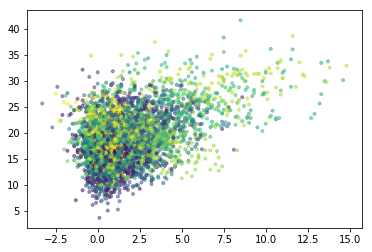

In [871]:
plt.scatter(p_wage['OWS'], p_wage['USG%'], c=p_wage['O_cluster'], marker='.', alpha=.5, label=p_wage['O_cluster'])


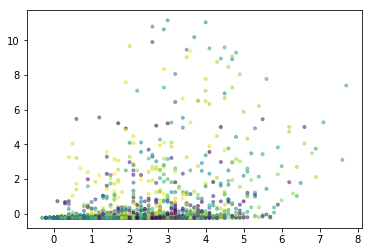

In [873]:
plt.scatter(p_wage['DWS'], p_wage['advotes'], c=p_wage['D_cluster'], marker='.', alpha=.5)


In [879]:
p_wage['O_cluster'] = labsO
p_wage['D_cluster'] = labsD

In [791]:
print(p_wage[p_wage['cluster'] == 6]['DWS'].std())

1.352052299744881


In [781]:
print(p_wage['OWS'].max(), p_wage['OWS'].min())

14.8 -3.3


In [855]:
p_wage.groupby('O_cluster').mean().sort_values('OWS', ascending=False)

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,D_cluster
O_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12,26.90,70.32,2511.03,23.52,0.57,0.24,0.35,2.69,12.88,7.84,44.23,2.30,0.79,15.92,27.25,7.28,2.94,10.23,0.19,5.32,1.58e-01,5.48,4.87,11.89,10.89,9.89,35.66,1.69e+00,0.92,25.37,9.00
17,27.52,70.80,2518.20,23.21,0.58,0.28,0.39,3.31,14.13,8.79,27.48,1.98,1.13,12.29,29.35,7.01,2.90,9.91,0.19,4.90,4.07e-03,4.90,4.46,12.85,11.85,10.85,35.43,1.03e+00,0.95,17.33,10.67
13,25.68,70.68,2517.21,21.15,0.56,0.12,0.37,7.20,20.16,13.71,12.91,1.50,2.24,11.14,26.28,5.09,3.07,8.16,0.15,1.75,5.58e-01,2.31,2.77,10.80,9.80,8.80,35.60,2.57e-01,0.94,45.80,8.24
7,25.65,70.19,2466.63,16.62,0.54,0.28,0.29,2.62,11.17,6.90,24.42,1.85,0.83,14.02,22.77,3.30,2.22,5.52,0.11,1.71,-3.97e-01,1.31,2.11,11.07,10.07,9.07,35.09,2.41e-02,0.92,20.24,12.84
16,25.14,70.83,2060.52,17.41,0.57,0.05,0.38,10.74,21.70,16.20,6.85,1.26,3.13,12.75,18.51,3.23,2.68,5.91,0.14,-0.42,1.20e+00,0.77,1.48,12.16,11.16,10.16,29.03,1.75e-01,0.91,38.05,4.91
2,31.91,66.58,2034.81,17.60,0.55,0.20,0.31,4.98,17.39,11.23,14.70,1.43,1.80,11.53,23.85,2.83,2.45,5.27,0.12,0.66,3.11e-01,0.97,1.64,12.26,11.26,10.26,30.43,5.91e-01,0.87,36.33,14.77
14,24.80,68.97,2240.27,14.46,0.54,0.31,0.26,3.69,13.31,8.47,11.76,1.62,1.16,11.28,20.24,2.35,2.00,4.36,0.09,0.43,-1.61e-01,0.27,1.31,12.03,11.03,10.03,32.51,-4.01e-02,0.92,9.20,10.36
4,27.09,63.21,1859.92,16.60,0.53,0.26,0.27,2.20,10.60,6.37,35.42,1.98,0.52,16.67,22.68,2.19,1.59,3.78,0.10,1.33,-1.06e+00,0.27,1.14,12.49,11.49,10.49,29.33,-6.12e-03,0.91,4.88,5.15
9,31.24,69.09,1964.56,12.21,0.54,0.42,0.20,3.29,13.28,8.31,10.21,1.63,1.18,11.31,15.84,1.79,2.01,3.80,0.09,-0.09,3.91e-01,0.29,1.18,12.52,11.52,10.52,28.41,3.44e-01,0.90,18.07,13.81


In [846]:
p_wage[p_wage['O_cluster'] == 0][['Player','YR']]

,Player,YR
5,Brad Miller,6
15,Peja Stojakovic,6
17,Bonzi Wells,6
19,Metta World Peace,6
27,Kevin Martin,7
36,Metta World Peace,7
47,Kevin Martin,8
58,Metta World Peace,8
75,Kevin Martin,9
84,John Salmons,9


In [880]:
p_wage.groupby('D_cluster').mean().sort_values('DWS', ascending=False)

,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,O_cluster
D_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,26.91,69.74,2158.45,18.26,0.56,0.09,0.35,8.92,23.37,16.15,10.42,1.38,2.88,12.65,20.88,3.30,3.03,6.33,0.14,-0.06,1.55,1.49,1.99,11.99,10.99,9.99,30.90,0.40,0.90,53.95,11.86
1,27.00,66.25,2181.52,19.71,0.54,0.26,0.31,2.45,11.70,7.08,38.97,2.14,0.68,16.38,24.76,4.55,2.21,6.76,0.14,3.12,-0.52,2.60,2.88,12.40,11.40,10.40,32.65,0.78,0.92,13.77,7.97
5,26.56,69.32,2285.04,16.92,0.54,0.29,0.29,2.55,11.24,6.91,25.14,1.84,0.78,14.21,23.04,3.42,2.08,5.50,0.11,1.81,-0.52,1.28,2.02,11.67,10.67,9.67,32.84,0.17,0.92,12.55,8.58
6,26.70,69.03,2242.67,14.71,0.55,0.32,0.27,3.47,12.05,7.75,12.26,1.61,1.03,11.15,20.62,2.70,1.92,4.62,0.10,0.72,-0.41,0.31,1.37,11.97,10.97,9.97,32.45,0.04,0.92,7.12,11.29
7,26.45,60.99,1057.42,13.98,0.54,0.09,0.35,9.78,20.97,15.38,6.59,1.36,3.12,14.52,16.46,0.98,1.39,2.37,0.10,-2.17,1.00,-1.16,0.29,12.47,11.47,10.47,16.98,-0.19,0.90,10.26,9.84
0,26.82,65.98,1521.70,12.18,0.54,0.34,0.24,4.30,12.64,8.46,8.80,1.51,1.26,11.50,17.39,1.25,1.32,2.57,0.08,-0.73,-0.40,-1.13,0.38,12.15,11.15,10.15,22.96,-0.14,0.91,3.58,9.27
2,26.91,58.55,1068.05,11.81,0.50,0.32,0.23,2.27,9.41,5.84,22.87,1.83,0.56,16.47,18.79,0.54,0.86,1.40,0.06,-1.28,-1.32,-2.60,-0.05,12.22,11.22,10.22,17.82,-0.21,0.88,1.40,8.62
3,25.53,51.68,647.95,10.01,0.51,0.28,0.28,5.57,12.85,9.22,7.57,1.43,1.57,13.36,16.17,0.21,0.60,0.81,0.06,-2.58,-0.56,-3.14,-0.14,11.84,10.84,9.84,12.16,-0.22,0.88,2.28,10.60


In [875]:
p_wage.groupby('D_cluster').count()

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,O_cluster
D_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309,309
1,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180,180
2,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182
3,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225,225
4,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250,250
5,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259,259
6,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223,223
7,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178,178
8,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351,351


In [833]:
p_wage.groupby('D_cluster').count()

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,O_cluster
D_cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504,504
1,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578,578
2,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490,490
3,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442,442
4,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456,456
5,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672,672
6,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203,203
7,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340,340
8,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550,550


In [828]:
p_wage[p_wage['TM'] == 'Dallas Mavericks 10-11']

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,O_cluster,D_cluster
3520,J.J. Barea,PG,26.0,81.0,1669.0,14.8,0.54,2.91e-01,0.24,2.1,8.8,5.6,31.2,0.9,0.0,15.9,23.9,1.9,1.4,3.2,0.09,0.6,-1.7,-1.1,0.4,Dallas Mavericks 10-11,11,10.0,9.0,20.60,-0.23,1.00,1.43,2,4
3525,Brian Cardinal,SF,33.0,56.0,618.0,9.7,0.67,8.70e-01,0.18,2.0,8.9,5.6,9.1,2.0,0.9,13.6,9.5,1.0,0.7,1.7,0.13,1.1,1.3,2.4,0.7,Dallas Mavericks 10-11,11,10.0,9.0,11.04,-0.23,0.80,1.87,5,2
3526,Tyson Chandler,C,28.0,74.0,2059.0,18.4,0.70,0.00e+00,0.72,12.2,26.6,19.7,2.4,0.9,3.0,14.1,14.2,5.8,3.5,9.4,0.22,0.5,1.7,2.2,2.2,Dallas Mavericks 10-11,11,10.0,9.0,27.82,1.14,1.00,19.24,4,8
3527,Brendan Haywood,C,31.0,72.0,1331.0,11.7,0.53,4.00e-03,0.79,11.8,20.9,16.5,2.1,0.6,4.2,14.5,12.4,0.8,2.1,2.9,0.10,-3.2,2.1,-1.0,0.3,Dallas Mavericks 10-11,11,10.0,9.0,18.49,-0.17,1.00,10.12,1,9
3529,Jason Kidd,PG,37.0,80.0,2653.0,14.4,0.50,6.56e-01,0.13,1.6,13.4,7.7,35.4,2.7,0.8,22.1,14.3,2.5,3.9,6.4,0.12,1.0,2.1,3.1,3.4,Dallas Mavericks 10-11,11,10.0,9.0,33.16,2.47,0.67,28.60,2,6
3530,Ian Mahinmi,C,24.0,56.0,488.0,13.7,0.65,2.00e-02,0.84,10.7,17.8,14.4,2.5,1.5,2.3,15.7,15.3,1.0,0.8,1.8,0.18,-1.3,0.8,-0.6,0.2,Dallas Mavericks 10-11,11,10.0,9.0,8.71,-0.23,1.00,1.43,1,0
3531,Shawn Marion,SF,32.0,80.0,2253.0,17.0,0.55,4.00e-02,0.20,9.1,19.2,14.3,8.3,1.6,1.7,12.5,21.5,2.3,3.4,5.6,0.12,-0.7,1.8,1.2,1.8,Dallas Mavericks 10-11,11,10.0,9.0,28.16,1.14,0.80,18.00,4,8
3534,Dirk Nowitzki,PF,32.0,73.0,2504.0,23.4,0.61,1.42e-01,0.38,2.4,20.8,12.0,14.2,0.8,1.4,9.1,28.2,7.8,3.3,11.1,0.21,3.2,0.6,3.8,3.7,Dallas Mavericks 10-11,11,10.0,9.0,34.30,-0.23,0.80,10.69,9,7
3535,DeShawn Stevenson,SG,29.0,72.0,1158.0,9.8,0.55,7.55e-01,0.13,2.1,8.4,5.4,10.0,1.0,0.3,11.2,15.9,0.8,1.0,1.8,0.07,0.6,-0.8,-0.3,0.5,Dallas Mavericks 10-11,11,10.0,9.0,16.08,-0.23,1.00,1.18,5,2
3536,Jason Terry,SG,33.0,82.0,2564.0,15.9,0.55,3.22e-01,0.20,1.1,5.7,3.5,22.2,1.9,0.4,12.4,24.7,2.8,2.5,5.3,0.10,1.5,-0.9,0.6,1.7,Dallas Mavericks 10-11,11,10.0,9.0,31.27,-0.22,0.80,4.24,2,3


In [829]:
p_wage[p_wage['TM'] == 'Golden State Warriors 15-16']

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP,O_cluster,D_cluster
5716,Leandro Barbosa,SG,33.0,68.0,1079.0,11.7,0.55,2.97e-01,0.17,3.0,8.4,5.8,10.6,2.0,0.7,11.8,18.1,0.9,1.2,2.1,0.09,-1.2,-0.9,-2.1,0.0,Golden State Warriors 15-16,16,15.0,14.0,15.87,-0.23,0.80,1.24,7,2
5717,Harrison Barnes,SF,23.0,66.0,2042.0,12.3,0.56,3.38e-01,0.21,4.3,12.4,8.6,7.8,1.0,0.4,7.6,15.9,3.1,1.9,4.9,0.12,0.4,-0.6,-0.2,0.9,Golden State Warriors 15-16,16,15.0,14.0,30.94,-0.22,0.75,2.59,8,1
5718,Andrew Bogut,C,31.0,70.0,1451.0,15.9,0.62,4.00e-03,0.18,9.5,26.0,18.3,14.8,1.1,5.8,21.6,11.4,2.6,2.9,5.4,0.18,-0.6,5.1,4.5,2.4,Golden State Warriors 15-16,16,15.0,14.0,20.73,1.15,1.00,202.25,7,8
5719,Ian Clark,SG,24.0,66.0,578.0,11.5,0.54,4.16e-01,0.17,2.6,9.7,6.3,15.3,1.4,1.7,16.5,19.5,0.3,0.6,0.9,0.07,-1.8,-1.3,-3.0,-0.2,Golden State Warriors 15-16,16,15.0,14.0,8.76,-0.23,1.00,0.66,5,2
5720,Stephen Curry,PG,27.0,79.0,2700.0,31.5,0.67,5.54e-01,0.25,2.9,13.6,8.6,33.7,3.0,0.4,12.9,32.6,13.8,4.1,17.9,0.32,12.4,0.1,12.5,9.8,Golden State Warriors 15-16,16,15.0,14.0,34.18,0.06,1.00,20.27,3,6
5721,Festus Ezeli,C,26.0,46.0,770.0,17.7,0.56,0.00e+00,0.58,13.5,21.9,18.0,5.8,1.1,4.8,11.7,18.2,1.4,1.3,2.7,0.17,-1.5,1.4,-0.1,0.4,Golden State Warriors 15-16,16,15.0,14.0,16.74,-0.23,1.00,3.29,1,0
5722,Draymond Green,PF,25.0,81.0,2808.0,19.3,0.59,3.15e-01,0.40,5.5,23.0,14.7,29.0,2.0,3.0,21.2,18.8,6.0,5.1,11.1,0.19,2.0,3.9,5.8,5.5,Golden State Warriors 15-16,16,15.0,14.0,34.67,4.33,1.00,204.70,2,3
5723,Andre Iguodala,SF,32.0,65.0,1732.0,12.2,0.56,4.18e-01,0.23,3.4,12.4,8.2,16.3,2.0,0.8,16.3,12.1,2.3,2.1,4.4,0.12,0.3,1.3,1.6,1.6,Golden State Warriors 15-16,16,15.0,14.0,26.65,4.07,0.80,8.02,7,1
5724,Shaun Livingston,PG,30.0,78.0,1520.0,13.8,0.58,3.20e-02,0.24,3.2,8.5,6.0,21.0,1.8,1.3,15.7,14.2,2.9,1.7,4.6,0.14,-0.6,0.1,-0.5,0.6,Golden State Warriors 15-16,16,15.0,14.0,19.49,-0.21,1.00,2.82,6,4
5726,James Michael McAdoo,PF,23.0,41.0,262.0,15.9,0.55,2.40e-02,0.58,13.1,10.9,11.9,9.2,1.8,2.2,13.2,20.1,0.5,0.3,0.8,0.15,-0.9,-0.3,-1.1,0.1,Golden State Warriors 15-16,16,15.0,14.0,6.39,-0.23,0.75,0.51,1,2


In [730]:
p_wage.groupby('cluster').count()

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,BPM,VORP,TM,YR,YRprior,2YRprior,MPG,advotes,AgeMulti,DWMP
cluster,,,,,,,,,,,,,,,,,,,,,
0,431,431,431,431,431,431,431,431,431,431,...,431,431,431,431,431,431,431,431,431,431
1,605,605,605,605,605,605,605,605,605,605,...,605,605,605,605,605,605,605,605,605,605
2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
3,530,530,530,530,530,530,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
4,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193,...,1193,1193,1193,1193,1193,1193,1193,1193,1193,1193
5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,493,493,493,493,493,493,493,493,493,493,...,493,493,493,493,493,493,493,493,493,493
7,480,480,480,480,480,480,480,480,480,480,...,480,480,480,480,480,480,480,480,480,480
8,283,283,283,283,283,283,283,283,283,283,...,283,283,283,283,283,283,283,283,283,283


In [188]:
pdata[pdata['TM'] == 'Dallas Mavericks 10-11'][['Player','AST%','OWS','OBPM','USG%','PER', 'Pos','MP','Age','AgeMulti']]

,Player,AST%,OWS,OBPM,USG%,PER,Pos,MP,Age,AgeMulti
1010,Sasha Pavlovic,6.3,0.0,-2.1,12.1,7.8,SF,163.0,27.0,1.00
2580,Alexis Ajinca,4.3,0.0,-3.6,21.4,12.8,C,75.0,22.0,0.75
2605,Peja Stojakovic,7.0,0.7,1.7,18.7,14.1,SF,506.0,33.0,0.80
3520,J.J. Barea,31.2,1.9,0.6,23.9,14.8,PG,1669.0,26.0,1.00
3521,Rodrigue Beaubois,21.9,-0.4,-1.4,26.7,11.4,PG,496.0,22.0,0.75
3522,Corey Brewer,13.3,0.3,2.1,22.2,17.6,SG,148.0,24.0,1.00
3524,Caron Butler,9.1,0.2,-1.4,25.1,14.2,SF,867.0,30.0,1.00
3525,Brian Cardinal,9.1,1.0,1.1,9.5,9.7,SF,618.0,33.0,0.80
3526,Tyson Chandler,2.4,5.8,0.5,14.2,18.4,C,2059.0,28.0,1.00
3527,Brendan Haywood,2.1,0.8,-3.2,12.4,11.7,C,1331.0,31.0,1.00


In [340]:
p2yr[p2yr['TM_x'] == 'Dallas Mavericks 10-11'][['Player','AST%_y','OWS_y','OBPM_y','USG%_y','PER_y', 'Pos_y','MP_y','Age_y','AgeMulti_y']]


,Player,AST%_y,OWS_y,OBPM_y,USG%_y,PER_y,Pos_y,MP_y,Age_y,AgeMulti_y
1150,Sasha Pavlovic,10.0,-1.5,-5.0,18.1,5.4,SF,877.0,26.0,1.00
2994,Alexis Ajinca,0.0,-0.1,-8.5,19.3,6.3,C,30.0,21.0,0.75
3021,Peja Stojakovic,7.2,1.9,0.7,18.6,12.4,SF,1947.0,32.0,0.80
4113,J.J. Barea,26.1,1.0,-0.6,19.9,12.8,PG,1546.0,25.0,1.00
4114,Rodrigue Beaubois,18.6,1.1,2.4,24.7,18.5,PG,700.0,21.0,0.75
4115,Corey Brewer,12.5,-0.4,-1.0,21.5,12.1,SG,2482.0,23.0,0.75
4117,Caron Butler,9.6,0.4,-1.0,22.0,13.5,SF,1853.0,29.0,1.00
4118,Caron Butler,8.5,0.2,-1.1,22.3,14.2,SG,930.0,29.0,1.00
4119,Brian Cardinal,12.3,0.3,-2.5,8.3,6.9,PF,267.0,32.0,0.80
4120,Tyson Chandler,2.2,0.9,-3.2,14.0,12.5,C,1163.0,27.0,1.00


In [220]:
pdata

,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,...,TM,YR,YRprior,2YRprior,MPG,advotes,DWMP,expDBPM,bothexp,AgeMulti
0,Shareef Abdur-Rahim,PF,29.0,72.0,1961.0,17.2,0.588,0.035,0.440,6.4,...,Sacramento Kings 05-06,6,5.0,4.0,27.236111,0.0,4.755332,1.491825,4.755332,1.00
1,Mike Bibby,PG,27.0,82.0,3167.0,17.9,0.554,0.360,0.292,1.1,...,Sacramento Kings 05-06,6,5.0,4.0,38.621951,0.0,3.529217,0.100259,3.529217,1.00
2,Francisco Garcia,SF,24.0,67.0,1301.0,10.3,0.510,0.422,0.311,3.5,...,Sacramento Kings 05-06,6,5.0,4.0,19.417910,0.0,3.961449,2.718282,3.961449,1.00
3,Jason Hart,PG,27.0,66.0,818.0,7.1,0.444,0.140,0.253,1.7,...,Sacramento Kings 05-06,6,5.0,4.0,12.393939,0.0,0.952007,0.496585,0.952007,1.00
4,Kevin Martin,SG,22.0,72.0,1913.0,14.8,0.604,0.328,0.407,3.6,...,Sacramento Kings 05-06,6,5.0,4.0,26.569444,0.0,2.504501,0.496585,2.670746,0.75
5,Brad Miller,C,29.0,79.0,2923.0,17.5,0.576,0.100,0.385,4.9,...,Sacramento Kings 05-06,6,5.0,4.0,37.000000,0.0,22.179714,5.473947,22.179714,1.00
6,Sergei Monia,SF,22.0,3.0,7.0,12.1,0.347,0.500,1.000,0.0,...,Sacramento Kings 05-06,6,5.0,4.0,2.333333,0.0,0.303009,0.818731,0.304012,0.75
7,Sergei Monia,SF,22.0,23.0,336.0,6.2,0.415,0.388,0.141,3.9,...,Portland Trail Blazers 05-06,6,5.0,4.0,14.608696,0.0,0.370911,0.223130,0.384031,0.75
8,Vitaly Potapenko,C,30.0,9.0,32.0,8.2,0.714,0.000,0.000,3.7,...,Sacramento Kings 05-06,6,5.0,4.0,3.555556,0.0,0.300826,0.036883,0.300826,1.00
9,Vitaly Potapenko,C,30.0,24.0,321.0,7.4,0.518,0.000,0.266,9.6,...,Seattle SuperSonics 05-06,6,5.0,4.0,13.375000,0.0,0.282638,0.049787,0.282638,1.00


In [221]:
p2yr = add_2yrs_prior(pdata)

In [676]:
p2yr.head()

,Player,Pos_x,Age_x,G_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,...,TM,YR,YRprior,2YRprior,MPG,advotes,DWMP,expDBPM,bothexp,AgeMulti
0,Shareef Abdur-Rahim,PF,29.0,72.0,1961.0,17.2,0.588,0.035,0.440,6.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mike Bibby,PG,27.0,82.0,3167.0,17.9,0.554,0.360,0.292,1.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Francisco Garcia,SF,24.0,67.0,1301.0,10.3,0.510,0.422,0.311,3.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jason Hart,PG,27.0,66.0,818.0,7.1,0.444,0.140,0.253,1.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kevin Martin,SG,22.0,72.0,1913.0,14.8,0.604,0.328,0.407,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [238]:
def get_2yr_mean2(df):
    ap_2yr_mean = df[['Player', 'Pos_x', 'Age_x', 'TM_x','YR_x']]

    col_means = ['MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'MPG','advotes','DWMP', 'expDBPM', 'bothexp', 'AgeMulti']
    cols = ['MP_y', 'PER_y', 'TS%_y', '3PAr_y', 'FTr_y', 'ORB%_y', 'DRB%_y', 'TRB%_y', 'AST%_y', 'STL%_y', 'BLK%_y','TOV%_y', 'USG%_y', 'OWS_y', 'DWS_y', 'WS_y', 'WS/48_y', 'OBPM_y', 'DBPM_y', 'BPM_y', 'VORP_y', 'MPG_y','advotes_y','DWMP_y', 'expDBPM_y', 'bothexp_y', 'AgeMulti_y']

    for i in range(len(col_means)):
        ap_2yr_mean[str(col_means[i])+"mean"] = (df[col_means[i]] + df[cols[i]])/2
    
    return ap_2yr_mean

In [239]:
p2m = get_2yr_mean2(p2yr)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [397]:
p2all = p2yr

In [398]:
p2a = p2all.sort_values('MP_y', ascending=False).groupby('TM_x').head(8)
p2a = p2a.dropna()
p2 = p2a.groupby('TM_x').mean().reset_index()
c2 = pd.merge(p2, tadv, how='outer', left_on='TM_x', right_on="TM")

In [399]:
c2.head()

,TM_x,Age_x,G_x,MP_x,PER_x,TS%_x,3PAr_x,FTr_x,ORB%_x,DRB%_x,...,MPG,advotes,DWMP,expDBPM,bothexp,AgeMulti,ORtg,DRtg,NRtg,TM
0,Atlanta Hawks 07-08,25.000,63.857143,1980.428571,15.314286,0.546429,0.188429,0.361143,5.271429,13.028571,...,31.724841,0.321429,3.636713,1.738999,4.389320,0.857143,106.9,108.9,-2.0,Atlanta Hawks 07-08
1,Atlanta Hawks 08-09,26.000,74.166667,2281.833333,15.483333,0.551500,0.265500,0.359500,6.016667,14.066667,...,32.846052,0.947917,12.817949,6.421369,15.570629,0.875000,109.3,107.6,1.7,Atlanta Hawks 08-09
2,Atlanta Hawks 09-10,27.500,79.625000,2404.625000,16.087500,0.549500,0.285250,0.243125,4.450000,12.925000,...,33.847747,1.658203,15.027821,6.159588,17.531308,0.906250,111.9,106.7,5.2,Atlanta Hawks 09-10
3,Atlanta Hawks 10-11,28.000,65.375000,2090.250000,14.962500,0.548125,0.300500,0.231625,3.287500,12.787500,...,34.703548,5.875000,9.792529,4.607374,11.476094,0.906250,106.1,107.0,-0.9,Atlanta Hawks 10-11
4,Atlanta Hawks 11-12,28.875,49.875000,1267.125000,15.575000,0.536500,0.233375,0.261500,4.275000,15.137500,...,28.450423,10.368652,33.101246,10.502237,30.565356,0.937500,104.9,101.2,3.7,Atlanta Hawks 11-12


In [224]:
p2m.head()

,Player,Pos_x,Age_x,TM_x,YR_x,MPmean,PERmean,TS%mean,3PArmean,FTrmean,...,OWSmean,DWSmean,WSmean,WS/48mean,OBPMmean,DBPMmean,BPMmean,VORPmean,MPGmean,advotesmean
0,Shareef Abdur-Rahim,PF,29.0,Sacramento Kings 05-06,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Mike Bibby,PG,27.0,Sacramento Kings 05-06,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Francisco Garcia,SF,24.0,Sacramento Kings 05-06,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Jason Hart,PG,27.0,Sacramento Kings 05-06,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Kevin Martin,SG,22.0,Sacramento Kings 05-06,6.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [240]:
p2m10 = p2m.sort_values('MPmean', ascending=False).groupby('TM_x').head(10)

In [341]:
p2m8 = p2m.sort_values('MPmean', ascending=False).groupby('TM_x').head(8)

In [352]:
p2m6 = p2m.sort_values('MPmean', ascending=False).groupby('TM_x').head(8)
p6 = p2m6.dropna()
tm6 = p6.groupby('TM_x').mean().reset_index()
comb6 = pd.merge(tm6, tadv, how='outer', left_on='TM_x', right_on="TM")

In [241]:
p10 = p2m10.dropna()

In [342]:
p8 = p2m8.dropna()

In [242]:
tm10 = p10.groupby('TM_x').mean().reset_index()

In [343]:
tm8 = p8.groupby('TM_x').mean().reset_index()

In [243]:
tm10.columns

Index(['TM_x', 'Age_x', 'YR_x', 'MPmean', 'PERmean', 'TS%mean', '3PArmean',
       'FTrmean', 'ORB%mean', 'DRB%mean', 'TRB%mean', 'AST%mean', 'STL%mean',
       'BLK%mean', 'TOV%mean', 'USG%mean', 'OWSmean', 'DWSmean', 'WSmean',
       'WS/48mean', 'OBPMmean', 'DBPMmean', 'BPMmean', 'VORPmean', 'MPGmean',
       'advotesmean', 'DWMPmean', 'expDBPMmean', 'bothexpmean',
       'AgeMultimean'],
      dtype='object')

In [191]:
%run team_targets

In [192]:
tadv = advteam_target()

In [244]:
comb = pd.merge(tm10, tadv, how='outer', left_on='TM_x', right_on="TM")

In [344]:
comb8 = pd.merge(tm8, tadv, how='outer', left_on='TM_x', right_on="TM")

In [245]:
comb[D]

,TM_x,Age_x,YR_x,MPmean,PERmean,TS%mean,3PArmean,FTrmean,ORB%mean,DRB%mean,...,MPGmean,advotesmean,DWMPmean,expDBPMmean,bothexpmean,AgeMultimean,ORtg,DRtg,NRtg,TM
0,Atlanta Hawks 07-08,27.3,8.0,2022.35,14.485,0.52890,0.17995,0.3329,5.275,12.230,...,29.554040,0.528125,6.404743,3.050029,7.521806,0.8800,106.9,108.9,-2.0,Atlanta Hawks 07-08
1,Atlanta Hawks 08-09,27.4,9.0,1764.45,14.425,0.51530,0.21800,0.3316,4.650,11.415,...,28.314692,0.947656,9.720916,4.354492,11.483835,0.9250,109.3,107.6,1.7,Atlanta Hawks 08-09
2,Atlanta Hawks 09-10,27.4,10.0,2159.70,15.390,0.54170,0.25685,0.3178,4.810,13.140,...,32.703484,1.363281,10.390126,4.394671,12.072125,0.9125,111.9,106.7,5.2,Atlanta Hawks 09-10
3,Atlanta Hawks 10-11,28.2,11.0,2141.15,15.680,0.55040,0.26895,0.3083,4.815,13.145,...,30.632220,6.450000,17.829465,6.238893,17.488553,0.9375,106.1,107.0,-0.9,Atlanta Hawks 10-11
4,Atlanta Hawks 11-12,29.3,12.0,1896.25,14.445,0.54185,0.17450,0.3082,5.340,15.430,...,28.022170,13.341528,20.665103,7.745616,19.504032,0.9485,104.9,101.2,3.7,Atlanta Hawks 11-12


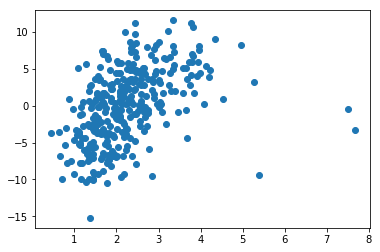

In [419]:
plt.scatter(c2['DWS_y'] + (.01 * c2['DWMP_y']), c2['NRtg'])


In [644]:
c2 = pd.merge(c2, target, how="outer", on="TM_x")

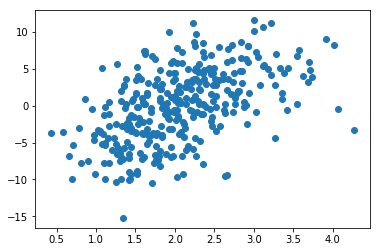

In [420]:
plt.scatter(c2['DWS_y'], c2['NRtg'])

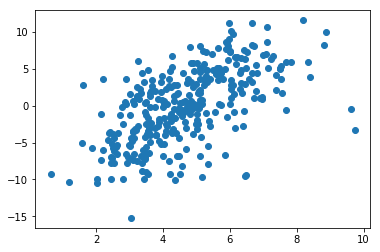

In [662]:
plt.scatter(comb6['OWSmean'] + (comb6['DWSmean']+(.01*(comb6['DWMPmean']))), comb6['NRtg'])


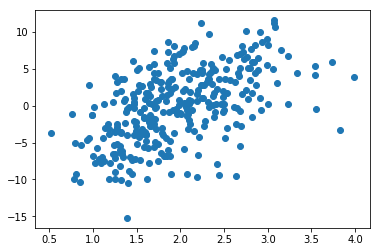

In [672]:
plt.scatter(comb8['DWSmean'], comb8['NRtg'])

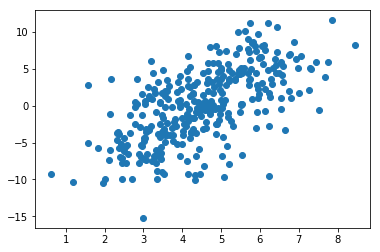

In [669]:
plt.scatter(comb8['WSmean'], comb8['NRtg'])


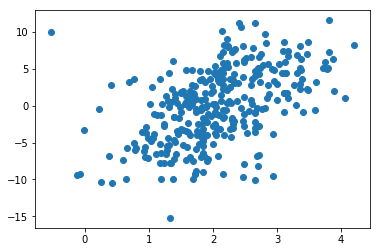

In [417]:
plt.scatter(comb['OWSmean'] - (.01 * comb['DWMPmean']), comb['NRtg'])


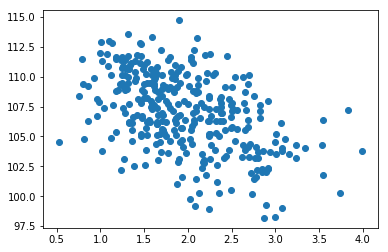

In [345]:
plt.scatter(comb8['DWSmean'], comb8['DRtg'])

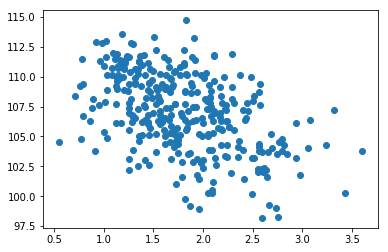

In [347]:
plt.scatter(comb['DWSmean'], comb['DRtg'])

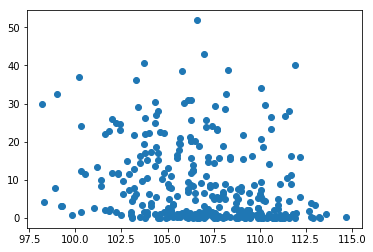

In [284]:
plt.scatter(comb['DRtg'], (comb['advotesmean']))


In [422]:
target = pd.read_csv('data/TEAMstats - target_hc.csv')

In [424]:
target['TM_x'] = target['TM_x'].str.replace('*', '')

In [426]:
target['TM_x'] = target['TM_x'] + ' ' + target['YR']

In [428]:
target = target.drop('YR', axis=1)

In [429]:
ct = pd.merge(comb, target, how="outer", on="TM_x")

In [444]:
ct = ct.dropna()

In [629]:
bas = ct[['OWSmean','DWSmean']]
bas_targ = ct['HomeCourt']

In [630]:
#basic 2 yr mean
X_train_bas, X_test_bas, y_train_bas, y_test_bas = train_test_split(bas, bas_targ, random_state=45)

In [447]:
#Testing out Logistic Regression
X = X_train_bas
X_const = add_constant(X, prepend=True)
y = y_train_bas

In [448]:
model = Logit(y, X_const).fit()

Optimization terminated successfully.
         Current function value: 0.437790
         Iterations 7


In [449]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              HomeCourt   No. Observations:                  247
Model:                          Logit   Df Residuals:                      244
Method:                           MLE   Df Model:                            2
Date:                Wed, 03 Apr 2019   Pseudo R-squ.:                  0.2348
Time:                        15:12:41   Log-Likelihood:                -108.13
converged:                       True   LL-Null:                       -141.31
                                        LLR p-value:                 3.890e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.4517      0.879     -7.340      0.000      -8.174      -4.729
OWSmean        1.2214      0.273      4.476      0.000       0.687       1.756
DWSmean        1.3397      0.376      3.561      0.000       0.602       2.077
==============================================================================
"""

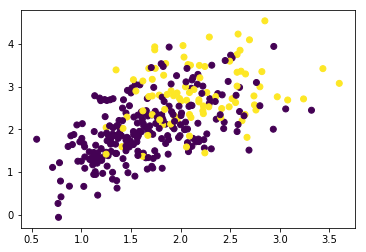

In [797]:
plt.scatter(ct['DWSmean'], ct['OWSmean'], c=ct['HomeCourt'])

In [631]:
# Train and fit model                                                   
rf = RandomForestClassifier(n_estimators=500,
                           max_features='auto',
                           random_state=45, n_jobs=-1)
rf.fit(X_train_bas, y_train_bas)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=45, verbose=0, warm_start=False)

In [632]:
# Test Prediction
pred_p = rf.predict(X_test_bas)
print('F1 score: {:.3}'.format(f1_score(y_test_bas, pred_p)))

F1 score: 0.652


In [633]:
tn, fp, fn, tp = confusion_matrix(y_test_bas, pred_p).ravel()

In [634]:
print(tp, fp)
print(fn, tn)

15 5
11 52


In [465]:
# Test Prediction
#pred_p = rf.predict(X_test_2)
print('Accuracy score: {:.3}'.format(rf.score(X_test_bas, y_test_bas)))

Accuracy score: 0.759


In [468]:
ct.columns

Index(['TM_x', 'Age_x', 'YR_x', 'MPmean', 'PERmean', 'TS%mean', '3PArmean',
       'FTrmean', 'ORB%mean', 'DRB%mean', 'TRB%mean', 'AST%mean', 'STL%mean',
       'BLK%mean', 'TOV%mean', 'USG%mean', 'OWSmean', 'DWSmean', 'WSmean',
       'WS/48mean', 'OBPMmean', 'DBPMmean', 'BPMmean', 'VORPmean', 'MPGmean',
       'advotesmean', 'DWMPmean', 'expDBPMmean', 'bothexpmean', 'AgeMultimean',
       'ORtg', 'DRtg', 'NRtg', 'TM', 'HomeCourt'],
      dtype='object')

In [648]:
c2 = c2.dropna()

In [649]:
one = c2[['OWS_y','DWS_y','DWMP_y']]
one_targ = c2['HomeCourt']

In [650]:
#1st attempt with all features
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(one, one_targ, random_state=50)

In [651]:
# Train and fit model                                                   
rf1 = RandomForestClassifier(n_estimators=250,
                           max_features='auto',
                           random_state=47, n_jobs=-1)
rf1.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=-1,
            oob_score=False, random_state=47, verbose=0, warm_start=False)

In [652]:
# Test Prediction
pred_p1 = rf1.predict(X_test_1)
print('F1 score: {:.3}'.format(f1_score(y_test_1, pred_p1)))

F1 score: 0.409


In [653]:
# Test Prediction
#pred_p = rf.predict(X_test_2)
print('Accuracy score: {:.3}'.format(rf1.score(X_test_1, y_test_1)))

Accuracy score: 0.687


In [654]:
tn1, fp1, fn1, tp1 = confusion_matrix(y_test_1, pred_p1).ravel()

In [655]:
print(tp1, fp1)
print(fn1, tn1)

9 8
18 48


In [ ]:
confusion_matrix